In [1]:
# import packages
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt

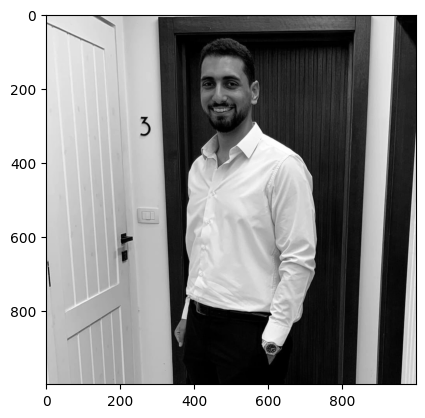

In [2]:
# read image that we will crop
img = Image.open('A:\Personal Info\Photos\me.jpg').convert('L')
img = img.resize((1000,1000))
plt.imshow(img, cmap='gray')

In [3]:
# get FFT of our image that is needed to be cropped
arr_fft = np.fft.fftshift(np.fft.fft2(img))
arr_amp = np.sqrt(np.real(arr_fft) ** 2 + np.imag(arr_fft) ** 2)
arr_phase = np.arctan2(np.imag(arr_fft), np.real(arr_fft))
arr_amp.shape

(1000, 1000)

In [4]:
# create a list of dict to simulate our program api
objects = [
{'x':0, 'y':0, 'width':900, 'height':900, 'className':'Rect'},
{'x':500, 'y':500, 'radiusX':450, 'radiusY':450, 'className':'Ellipse'},
{'x':500, 'y':500, 'radiusX':200, 'radiusY':300, 'className':'Ellipse'},
# {'x':40, 'y':40, 'width':100, 'height':100, 'className':'Rect'},
# {'x':750, 'y':750, 'width':800, 'height':800, 'className':'Rect'}
]

In [5]:
def crop_img(arr, img, shapes, mode='or'):
    img_copy = img.copy()
    arr_zeros = np.zeros(img_copy.size)
    arr_ones = np.ones(img_copy.size)
    for shape in shapes:
        img_mask = Image.new("L", img_copy.size)
        img_draw = ImageDraw.Draw(img_mask)

        if shape['className'] == 'Ellipse':
            img_draw.ellipse(((shape['x']-shape['radiusX']), (shape['y']-shape['radiusY']), (shape['x']+shape['radiusX']), (shape['y']+shape['radiusY'])), fill=1)
        else:
            img_draw.rounded_rectangle((shape['x'], shape['y'], shape['width'], shape['height']), 0, fill=1)
        img_copy.putalpha(img_mask)

        if mode == 'and':
            arr_ones = np.logical_and(arr_ones, np.array(img_copy)[:, :, 1])
            arr_cropped = arr * arr_ones
        elif mode == 'xor':
            arr_zeros = np.logical_xor(arr_zeros, np.array(img_copy)[:, :, 1])
            arr_cropped = arr * arr_zeros
        else:
            arr_zeros = np.logical_or(arr_zeros, np.array(img_copy)[:, :, 1])
            arr_cropped = arr * arr_zeros
    return arr_cropped

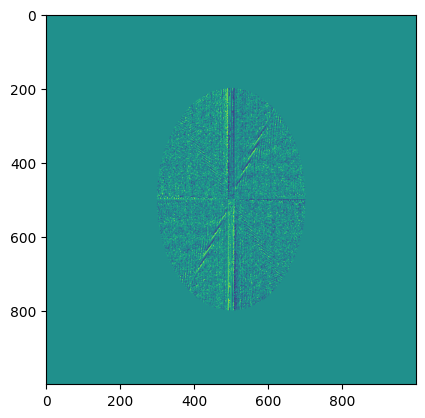

In [7]:
plt.imshow(crop_img(arr_phase, img, objects, mode='and'))

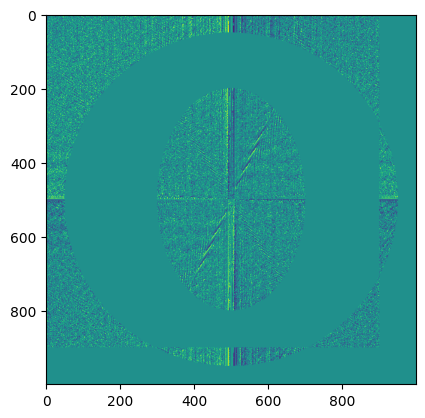

In [8]:
plt.imshow(crop_img(arr_phase, img, objects, mode='xor'))

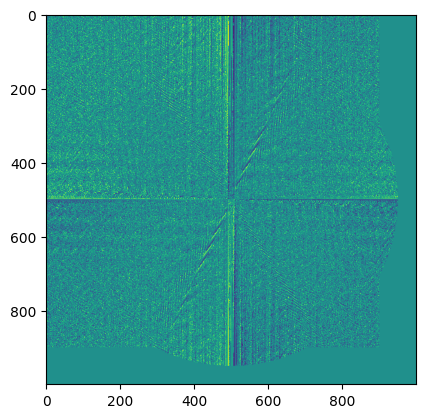

In [9]:
plt.imshow(crop_img(arr_phase, img, objects, mode='or'))